In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 讀取資料
rolling_predictions = pd.read_csv(r'C:\Users\User\Desktop\quant\Sector Allocation Framework under Reinforcement Learning Rotation\industry-rotation\industryRL_v5\rolling_predictions8.csv')
rolling_predictions['predict_start'] = pd.to_datetime(rolling_predictions['predict_start'])

In [3]:
# 定義績效指標計算函數
def calculate_metrics(returns, cumulative_returns):
    """計算各項績效指標"""
    # 移除 NaN 值
    returns = returns.dropna()
    
    # 計算年化報酬率
    years = (returns.index[-1] - returns.index[0]).days / 365
    total_return = cumulative_returns.iloc[-1]
    annualized_return = ((1 + total_return/100) ** (1/years) - 1) * 100
    
    # 計算夏普比率
    rf_rate = 0.02  # 無風險利率 2%
    excess_returns = returns - rf_rate/252
    sharpe = np.sqrt(252) * np.mean(excess_returns) / np.std(excess_returns)
    
    # 計算最大回撤
    cumulative = 1 + cumulative_returns/100
    rolling_max = np.maximum.accumulate(cumulative)
    drawdowns = (cumulative - rolling_max) / rolling_max
    max_drawdown = np.min(drawdowns) * 100
    
    return {
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Sharpe Ratio': sharpe,
        'Maximum Drawdown': max_drawdown
    }

In [4]:
# 計算各種策略的累積報酬
# 最佳策略
rolling_predictions['best_predicted_return'] = rolling_predictions[['rank1_return', 'rank2_return', 'rank3_return', 'rank4_return', 'rank5_return']].max(axis=1)
rolling_predictions['cumulative_best_return'] = rolling_predictions['best_predicted_return'].cumsum()

# Rank1-5 策略
for i in range(1, 6):
    rolling_predictions[f'cumulative_rank{i}_return'] = rolling_predictions[f'rank{i}_return'].cumsum()

# 等權策略
rolling_predictions['cumulative_equal_return'] = sum(rolling_predictions[f'rank{i}_return'].cumsum() * 0.2 for i in range(1, 6))

# 下載並計算大盤指數報酬
twii = yf.download('^TWII', 
                   start=rolling_predictions['predict_start'].min().strftime('%Y-%m-%d'),
                   end=rolling_predictions['predict_start'].max().strftime('%Y-%m-%d'))
twii['Cumulative_Return'] = (twii['Close'] / twii['Close'].iloc[0] * 100) - 100
twii.index = pd.to_datetime(twii.index).tz_localize(None)

[*********************100%***********************]  1 of 1 completed


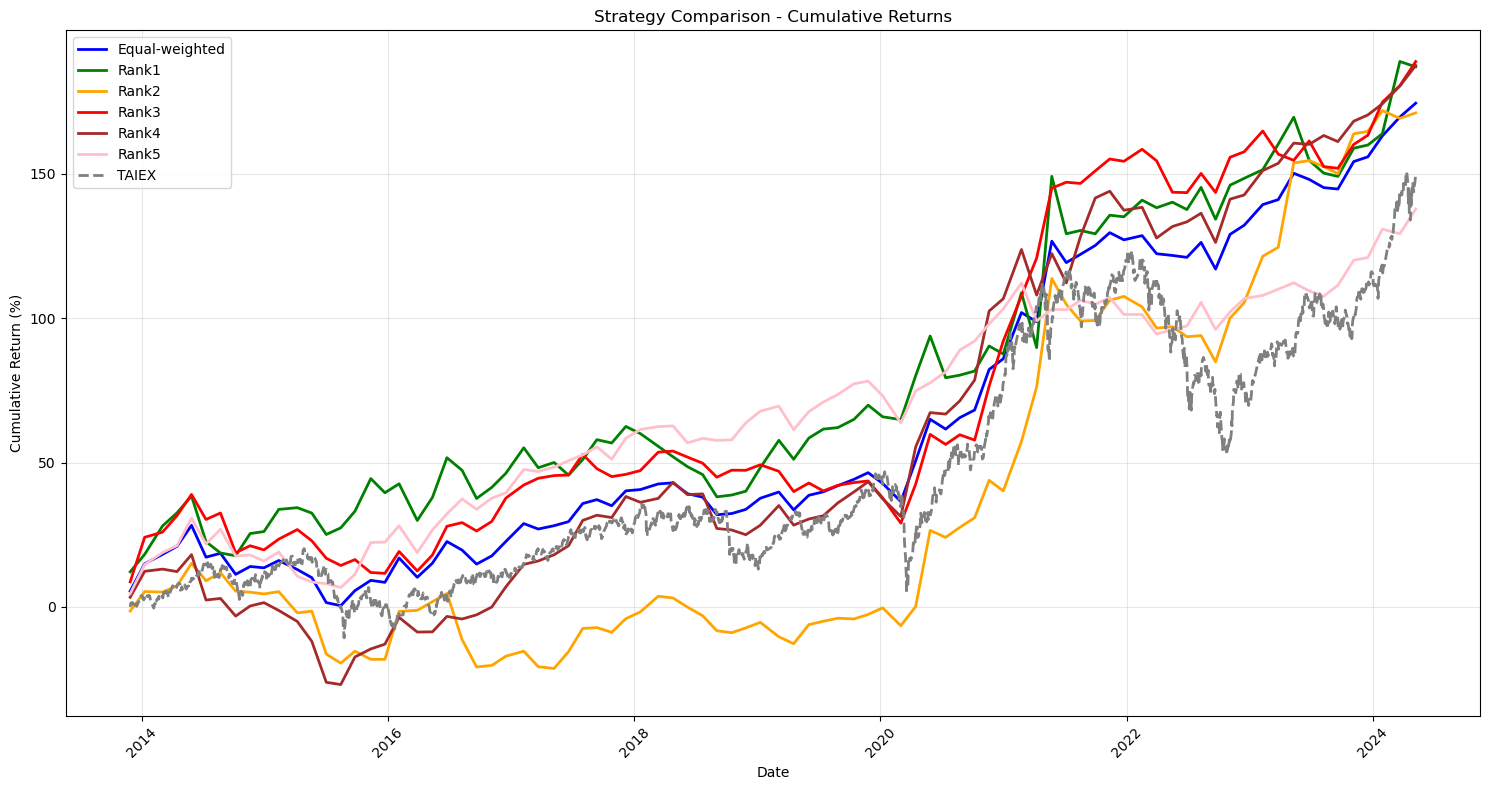

In [7]:
# 繪製所有策略的累積報酬比較圖
plt.figure(figsize=(15, 8))

# 繪製各策略線條
strategies = [
    #('cumulative_best_return', 'Best Strategy', 'purple'),
    ('cumulative_equal_return', 'Equal-weighted', 'blue'),
    ('cumulative_rank1_return', 'Rank1', 'green'),
    ('cumulative_rank2_return', 'Rank2', 'orange'),
    ('cumulative_rank3_return', 'Rank3', 'red'),
    ('cumulative_rank4_return', 'Rank4', 'brown'),
    ('cumulative_rank5_return', 'Rank5', 'pink')
]

for col, label, color in strategies:
    plt.plot(rolling_predictions['predict_start'], 
             rolling_predictions[col], 
             label=label, 
             linewidth=2,
             color=color)

# 繪製大盤指數
plt.plot(twii.index, 
         twii['Cumulative_Return'], 
         label='TAIEX', 
         color='gray', 
         linestyle='--', 
         linewidth=2)

plt.title('Strategy Comparison - Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

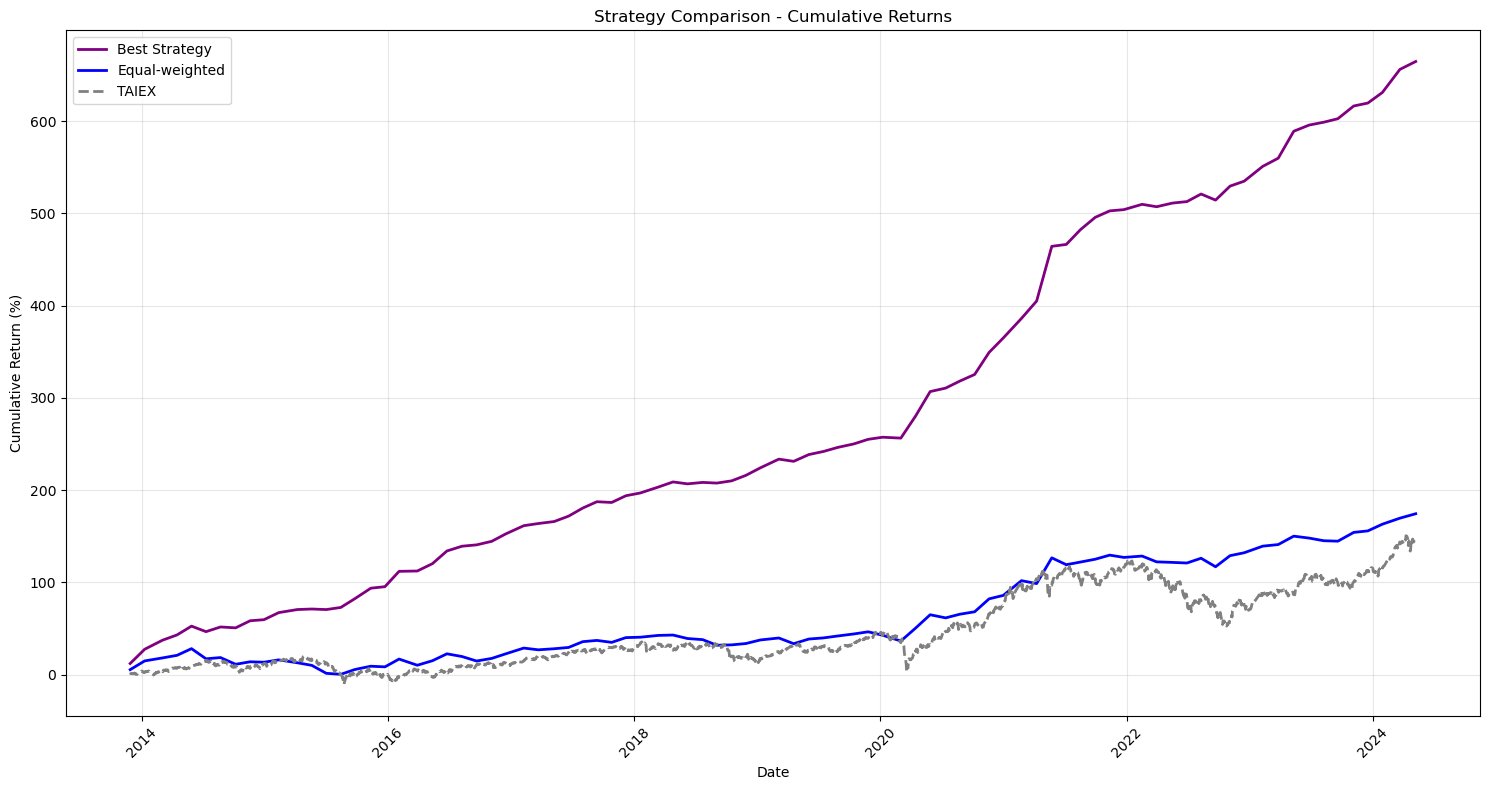

In [8]:
# 繪製所有策略的累積報酬比較圖
plt.figure(figsize=(15, 8))

# 繪製各策略線條
strategies = [
    ('cumulative_best_return', 'Best Strategy', 'purple'),
    ('cumulative_equal_return', 'Equal-weighted', 'blue'),

]

for col, label, color in strategies:
    plt.plot(rolling_predictions['predict_start'], 
             rolling_predictions[col], 
             label=label, 
             linewidth=2,
             color=color)

# 繪製大盤指數
plt.plot(twii.index, 
         twii['Cumulative_Return'], 
         label='TAIEX', 
         color='gray', 
         linestyle='--', 
         linewidth=2)

plt.title('Strategy Comparison - Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()